In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout,Convolution2D,MaxPooling2D
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import warnings
import itertools
import numpy as np
import os
import string


import cv2
%matplotlib inline


# Create Directories of Live Data

In [2]:
import string

if not os.path.exists("D:\\College\\Sem 4\\Mini Project\\Live Data"):
    os.mkdir("D:\\College\\Sem 4\\Mini Project\\Live Data")
if not os.path.exists("D:\\College\\Sem 4\\Mini Project\\Live Data\\Train"):
    os.mkdir("D:\\College\\Sem 4\\Mini Project\\Live Data\\Train")
if not os.path.exists("D:\\College\\Sem 4\\Mini Project\\Live Data\\Valid"):
    os.mkdir("D:\\College\\Sem 4\\Mini Project\\Live Data\\Valid")
if not os.path.exists("D:\\College\\Sem 4\\Mini Project\\Live Data\\Test"):
    os.mkdir("D:\\College\\Sem 4\\Mini Project\\Live Data\\Test")
    
path="D:\\College\\Sem 4\\Mini Project\\Live Data"
# for i in range(10):
#     if not os.path.exists(path +"\\Train\\" +str(i)):
#         os.makedirs(path +"\\Train\\" +str(i))
#     if not os.path.exists(path +"\\Valid\\" +str(i)):
#         os.makedirs(path +"\\Valid\\" +str(i))
#     if not os.path.exists(path +"\\Test\\" +str(i)):
#         os.makedirs(path +"\\Test\\"+ str(i))

for i in string.ascii_uppercase:
    if not os.path.exists(path +"\\Train\\" + i):
        os.makedirs(path +"\\Train\\" +i)
    if not os.path.exists(path +"\\Valid\\"  + i):
        os.makedirs(path +"\\Valid\\" +i)
    if not os.path.exists(path +"\\Test\\"+ i):
        os.makedirs(path +"\\Test\\"+i)

# Create Dataset

In [4]:
directory="D:\\College\\Sem 4\\Mini Project\\Live Data\\Train\\"
directory1="D:\\College\\Sem 4\\Mini Project\\Live Data\\Valid\\"
minValue = 70

cap = cv2.VideoCapture(0)
interrupt = -1  

while True:
    _, frame = cap.read()
    # Simulating mirror image
    frame = cv2.flip(frame, 1)
    
    # Getting count of existing images
    count = {
             'zero': len(os.listdir(directory1+"/0")),
#              'one': len(os.listdir(directory+"/1")),
#              'two': len(os.listdir(directory+"/2")),
#              'three': len(os.listdir(directory+"/3")),
#              'four': len(os.listdir(directory+"/4")),
#              'five': len(os.listdir(directory+"/5")),
#              'six': len(os.listdir(directory+"/6")),
#              'seven': len(os.listdir(directory+"/7")),
#              'eight': len(os.listdir(directory+"/8")),
#              'nine': len(os.listdir(directory+"/9")),
             'a': len(os.listdir(directory1+"/A")),
             'b': len(os.listdir(directory1+"/B")),
             'c': len(os.listdir(directory1+"/C")),
             'd': len(os.listdir(directory1+"/D")),
             'e': len(os.listdir(directory1+"/E")),
             'f': len(os.listdir(directory1+"/F")),
             'g': len(os.listdir(directory1+"/G")),
             'h': len(os.listdir(directory1+"/H")),
             'i': len(os.listdir(directory1+"/I")),
             'j': len(os.listdir(directory1+"/J")),
             'k': len(os.listdir(directory1+"/K")),
             'l': len(os.listdir(directory1+"/L")),
             'm': len(os.listdir(directory1+"/M")),
             'n': len(os.listdir(directory1+"/N")),
             'o': len(os.listdir(directory1+"/O")),
             'p': len(os.listdir(directory1+"/P")),
             'q': len(os.listdir(directory1+"/Q")),
             'r': len(os.listdir(directory1+"/R")),
             's': len(os.listdir(directory1+"/S")),
             't': len(os.listdir(directory1+"/T")),
             'u': len(os.listdir(directory1+"/U")),
             'v': len(os.listdir(directory1+"/V")),
             'w': len(os.listdir(directory1+"/W")),
             'x': len(os.listdir(directory1+"/X")),
             'y': len(os.listdir(directory1+"/Y")),
             'z': len(os.listdir(directory1+"/Z"))
             }
    
    # Printing the count in each set to the screen
    # cv2.putText(frame, "MODE : "+mode, (10, 50), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    # cv2.putText(frame, "IMAGE COUNT", (10, ), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "0 : "+str(count['zero']), (10, 40), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
#     cv2.putText(frame, "1 : "+str(count['one']), (10, 55), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
#     cv2.putText(frame, "2 : "+str(count['two']), (10, 70), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
#     cv2.putText(frame, "3 : "+str(count['three']), (10, 85), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
#     cv2.putText(frame, "4 : "+str(count['four']), (10, 100), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
#     cv2.putText(frame, "5 : "+str(count['five']), (10, 115), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
#     cv2.putText(frame, "6 : "+str(count['six']), (10, 130), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
#     cv2.putText(frame, "7 : "+str(count['seven']), (10, 145), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
#     cv2.putText(frame, "8 : "+str(count['eight']), (10, 160), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
#     cv2.putText(frame, "9 : "+str(count['nine']), (10, 175), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    
    letters=[]
    for i in string.ascii_lowercase:
        letters.append(i)
    nums=[]
    for i in range (190,190+15*21,15):
        nums.append(i)
    
    for l,n in zip(letters,nums):
        cv2.putText(frame, l+" : "+str(count[l]), (10, n), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)


    cv2.putText(frame, "u : "+str(count['u']), (75, 40), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "v : "+str(count['v']), (75, 55), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "w : "+str(count['w']), (75, 70), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "x : "+str(count['x']), (75, 85), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "y : "+str(count['y']), (75, 100), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "z : "+str(count['z']), (75, 115), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    
      # Drawing the ROI
    # The increment/decrement by 1 is to compensate for the bounding box
    cv2.rectangle(frame, (180-1, 9), (520+1, 411), (255,0,0) ,1)
    # Extracting the ROI
    roi = frame[10:410, 180:520]
    roi = cv2.resize(roi, (300, 300))
  
    cv2.imshow("Frame", frame)
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    
    blur = cv2.GaussianBlur(gray,(5,5),2)
    # #blur = cv2.bilateralFilter(roi,9,75,75)
   

    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret, test_image = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
 
    test_image = cv2.resize(test_image, (300,300))
    cv2.imshow("test", test_image)
    
    interrupt = cv2.waitKey(10)
    if interrupt & 0xFF == 27: # esc key
            break
    if interrupt & 0xFF == ord('0'):
            cv2.imwrite(directory1+'0/'+str(count['zero'])+'.jpg', roi)
#     if interrupt & 0xFF == ord('1'):
#         cv2.imwrite(directory+'1/'+str(count['one'])+'.jpg', roi)
#     if interrupt & 0xFF == ord('2'):
#         cv2.imwrite(directory+'2/'+str(count['two'])+'.jpg', roi)       
#     if interrupt & 0xFF == ord('3'):
#         cv2.imwrite(directory+'3/'+str(count['three'])+'.jpg', roi)
#     if interrupt & 0xFF == ord('4'):
#         cv2.imwrite(directory+'4/'+str(count['four'])+'.jpg', roi)
#     if interrupt & 0xFF == ord('5'):
#         cv2.imwrite(directory+'5/'+str(count['five'])+'.jpg', roi)
#     if interrupt & 0xFF == ord('6'):
#         cv2.imwrite(directory+'6/'+str(count['six'])+'.jpg', roi)
#     if interrupt & 0xFF == ord('7'):
#         cv2.imwrite(directory+'7/'+str(count['seven'])+'.jpg', roi)
#     if interrupt & 0xFF == ord('8'):
#         cv2.imwrite(directory+'8/'+str(count['eight'])+'.jpg', roi)
#     if interrupt & 0xFF == ord('9'):
#         cv2.imwrite(directory+'9/'+str(count['nine'])+'.jpg', roi)
    if interrupt & 0xFF == ord('a'):
        cv2.imwrite(directory1+'A/'+str(count['a'])+'.jpg', roi)
    if interrupt & 0xFF == ord('b'):
        cv2.imwrite(directory1+'B/'+str(count['b'])+'.jpg', roi)
    if interrupt & 0xFF == ord('c'):
        cv2.imwrite(directory1+'C/'+str(count['c'])+'.jpg', roi)
    if interrupt & 0xFF == ord('d'):
        cv2.imwrite(directory1+'D/'+str(count['d'])+'.jpg', roi)
    if interrupt & 0xFF == ord('e'):
        cv2.imwrite(directory1+'E/'+str(count['e'])+'.jpg', roi)
    if interrupt & 0xFF == ord('f'):
        cv2.imwrite(directory1+'F/'+str(count['f'])+'.jpg', roi)
    if interrupt & 0xFF == ord('g'):
        cv2.imwrite(directory1+'G/'+str(count['g'])+'.jpg', roi)
    if interrupt & 0xFF == ord('h'):
        cv2.imwrite(directory1+'H/'+str(count['h'])+'.jpg', roi)
    if interrupt & 0xFF == ord('i'):
        cv2.imwrite(directory1+'I/'+str(count['i'])+'.jpg', roi)
    if interrupt & 0xFF == ord('j'):
        cv2.imwrite(directory1+'J/'+str(count['j'])+'.jpg', roi)
    if interrupt & 0xFF == ord('k'):
        cv2.imwrite(directory1+'K/'+str(count['k'])+'.jpg', roi)
    if interrupt & 0xFF == ord('l'):
        cv2.imwrite(directory1+'L/'+str(count['l'])+'.jpg', roi)
    if interrupt & 0xFF == ord('m'):
        cv2.imwrite(directory1+'M/'+str(count['m'])+'.jpg', roi)
    if interrupt & 0xFF == ord('n'):
        cv2.imwrite(directory1+'N/'+str(count['n'])+'.jpg', roi)
    if interrupt & 0xFF == ord('o'):
        cv2.imwrite(directory1+'O/'+str(count['o'])+'.jpg', roi)
    if interrupt & 0xFF == ord('p'):
        cv2.imwrite(directory1+'P/'+str(count['p'])+'.jpg', roi)
    if interrupt & 0xFF == ord('q'):
        cv2.imwrite(directory1+'Q/'+str(count['q'])+'.jpg', roi)
    if interrupt & 0xFF == ord('r'):
        cv2.imwrite(directory1+'R/'+str(count['r'])+'.jpg', roi)
    if interrupt & 0xFF == ord('s'):
        cv2.imwrite(directory1+'S/'+str(count['s'])+'.jpg', roi)
    if interrupt & 0xFF == ord('t'):
        cv2.imwrite(directory1+'T/'+str(count['t'])+'.jpg', roi)
    if interrupt & 0xFF == ord('u'):
        cv2.imwrite(directory1+'U/'+str(count['u'])+'.jpg', roi)
    if interrupt & 0xFF == ord('v'):
        cv2.imwrite(directory1+'V/'+str(count['v'])+'.jpg', roi)
    if interrupt & 0xFF == ord('w'):
        cv2.imwrite(directory1+'W/'+str(count['w'])+'.jpg', roi)
    if interrupt & 0xFF == ord('x'):
        cv2.imwrite(directory1+'X/'+str(count['x'])+'.jpg', roi)
    if interrupt & 0xFF == ord('y'):
        cv2.imwrite(directory1+'Y/'+str(count['y'])+'.jpg', roi)
    if interrupt & 0xFF == ord('z'):
        cv2.imwrite(directory1+'Z/'+str(count['z'])+'.jpg', roi)        
    
cap.release()
cv2.destroyAllWindows()

TypeError: 'NoneType' object is not subscriptable

# Process Data

In [ ]:
if not os.path.exists("D:\\College\\Sem 4\\Mini Project\\Live Data Processed"):
    os.makedirs("D:\\College\\Sem 4\\Mini Project\\Live Data Processed")
if not os.path.exists("D:\\College\\Sem 4\\Mini Project\\Live Data Processed\\Train"):
    os.makedirs("D:\\College\\Sem 4\\Mini Project\\Live Data Processed\\train")
if not os.path.exists("D:\\College\\Sem 4\\Mini Project\\Live Data Processed\\Valid"):
    os.makedirs("D:\\College\\Sem 4\\Mini Project\\Live Data Processed\\valid")
if not os.path.exists("D:\\College\\Sem 4\\Mini Project\\Live Data Processed\\Test"):
    os.makedirs("D:\\College\\Sem 4\\Mini Project\\Live Data Processed\\test")

In [ ]:
path="D:\\College\\Sem 4\\Mini Project\\Live Data"
path1 = "D:\\College\\Sem 4\\Mini Project\\Live Data Processed"

for i in os.listdir(path+"\\Train"):
    if not os.path.exists(path1+"\\Train\\"+i):
        os.makedirs(path1+"\\Train\\"+i)
        os.makedirs(path1+"\\Valid\\"+i)
        #os.makedirs(path1+"\\Test\\"+i)

In [ ]:
minValue = 70
def func(path):    
    frame = cv2.imread(path)
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),2)

    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    return res

In [ ]:
for sets in os.listdir(path):
    for dire in os.listdir(path+f'\\{sets}'):
        for file in os.listdir(path+f'\\{sets}\\'+f'{dire}'):
            orignalpath=path+f'\\{sets}\\{dire}\\{file}'
            newpath=path1+f'\\{sets}\\{dire}\\{file}'
            img = cv2.imread(orignalpath, 0)
            bw_image = func(orignalpath)
            cv2.imwrite(newpath, bw_image)

# Dummy Model

In [12]:
# Initializing the CNN
classifier = Sequential()
sz=64
# First convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2),strides=2))
# Second convolution layer and pooling
classifier.add(Convolution2D(64, (3, 3), activation='relu', padding = 'same'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2),strides=2))
classifier.add(Convolution2D(128, (3, 3), activation='relu', padding = 'valid'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Flattening the layers
classifier.add(Flatten())

# Adding a fully connected layer
classifier.add(Dense(units=64, activation='relu'))
#classifier.add(Dropout(0.40))
classifier.add(Dense(units=128, activation='relu'))
#classifier.add(Dropout(0.40))
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=26, activation='softmax')) # softmax for more than 2


# Compiling the CNN
classifier.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy for more than 2


# Step 2 - Preparing the train/test data and training the model
classifier.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 31, 31, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)             

In [13]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

training_set = train_datagen.flow_from_directory("D:\\College\\Sem 4\\Mini Project\\Live Data Processed\\Train",target_size=(sz, sz),batch_size=10,class_mode='categorical')
valid_set= train_datagen.flow_from_directory("D:\\College\\Sem 4\\Mini Project\\Live Data Processed\\Valid", target_size=(sz, sz),batch_size=10,class_mode='categorical')
                                                 

test_set = test_datagen.flow_from_directory("D:\\College\\Sem 4\\Mini Project\\Live Data Processed\\Valid",target_size=(sz, sz),batch_size=10,class_mode='categorical')
                                            

Found 13000 images belonging to 26 classes.
Found 3900 images belonging to 26 classes.
Found 3900 images belonging to 26 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

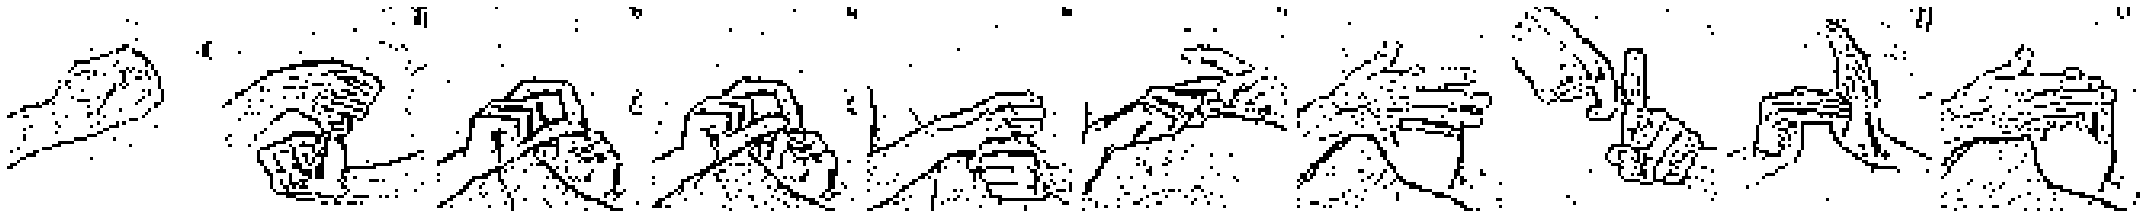

(10, 64, 64, 3)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]


In [14]:
imgs, labels = next(training_set)
#Plotting the images...
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(imgs.shape)
print(labels)

In [15]:
# Code copied from - https://keras.io/preprocessing/image/
from keras.preprocessing.image import ImageDataGenerator


classifier.fit(
        training_set,
        epochs=10,
        validation_data=valid_set,
        )

Epoch 1/10
1300/1300 [==============================] - 83s 64ms/step - loss: 0.7344 - accuracy: 0.7992 - val_loss: 1.8530 - val_accuracy: 0.7174
Epoch 2/10
1300/1300 [==============================] - 90s 69ms/step - loss: 0.1241 - accuracy: 0.9642 - val_loss: 2.1690 - val_accuracy: 0.6608
Epoch 3/10
1300/1300 [==============================] - 92s 71ms/step - loss: 0.1030 - accuracy: 0.9729 - val_loss: 2.8241 - val_accuracy: 0.6418
Epoch 4/10
1300/1300 [==============================] - 93s 71ms/step - loss: 0.0841 - accuracy: 0.9798 - val_loss: 2.4566 - val_accuracy: 0.7105
Epoch 5/10
1300/1300 [==============================] - 94s 72ms/step - loss: 0.0867 - accuracy: 0.9787 - val_loss: 2.3855 - val_accuracy: 0.7031
Epoch 6/10
1300/1300 [==============================] - 99s 76ms/step - loss: 0.0624 - accuracy: 0.9850 - val_loss: 2.3090 - val_accuracy: 0.7495
Epoch 7/10
1300/1300 [==============================] - 95s 73ms/step - loss: 0.0962 - accuracy: 0.9818 - val_loss: 2.8385 -

In [ ]:
test_labels=test_set.classes

In [ ]:
predictions=classifier.predict(x=test_set,verbose=0)

In [ ]:
cm=confusion_matrix(y_true=test_labels,y_pred=predictions.argmax(axis=1))

In [ ]:
test_set.class_indices

In [ ]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.figure(figsize = (15,10))
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix without normalization")
    print(cm)
    
    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment="center",color="white" if cm[i,j]>thresh else "black")
        
        plt.tight_layout()
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')

In [ ]:
cm_plot_labels=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels,title='Confusion Matrix')